# Evaluation of Blanton K-Corrections
This script makes a statistical comparison between two galaxy K correction estimations:

* On the one and, we will look at Blanton's [kcorrect](https://kcorrect.readthedocs.io/) estimations, which are calculated from photometry and a known redshift value.
* On the other hand, we will look at [FastSpecFit](https://fastspecfit.readthedocs.io/en/latest/) estimations, which are calculated from spectrometry AND photometry, and should therefore be more accurate. These estimations will be considered ground truth.

The dataset of galaxies used corresponds to 200K sources from DESI Early Data Release.

# Load Blanton estimations and inspect columns

The columns of the dataset are:
* targetid:  Source unique identifier in DESI edr
* kcorr_sdss_01_g: K correction at band SDSS-g with band shift 0.1
* kcorr_sdss_01_r: K correction at band SDSS-r with band shift 0.1
* kcorr_sdss_01_z: K correction at band SDSS-z with band shift 0.1
* z: redshift

The dataset has 197063 rows (galaxies).

In [64]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

blanton_kcorrs_path = "../data/blanton_kcorrs.pickle"

with open(blanton_kcorrs_path,"rb") as f:
    kcorr_df = pickle.load(f)

In [2]:
kcorr_df

,targetid,kcorr_sdss_01_g,kcorr_sdss_01_r,kcorr_sdss_01_z,z
0,39633062060887564,0.054363,-0.127675,-0.119030,0.171819
1,39633325282823017,-0.286014,-0.229255,-0.149813,0.058201
2,39632996176760219,0.153519,-0.093028,-0.124463,0.183058
3,39633275198636473,0.608072,0.110479,0.029995,0.278303
4,39633136551725040,-0.042727,-0.143907,-0.131968,0.131377
...,...,...,...,...,...
197058,39633301253652804,1.327562,0.465247,0.239314,0.517033
197059,39633251840558896,0.827001,0.195018,0.069751,0.493620
197060,39633136459448434,2.322428,1.321215,0.196064,0.773774
197061,39633158366298541,1.278910,0.746714,0.419264,0.642648


In [3]:
kcorr_df.shape

(197063, 5)

# Load FastSpecFit estimations and join tables

In [4]:
from astropy.io import fits

# Load the FITS file
filename = '/home/jrodriguez/deep-KCorrect/data/raw/fastspec-fuji.fits'
hdul = fits.open(filename)

fastspec_data = hdul['FASTSPEC'].data

from astropy.table import Table

# Convert FITS_rec to Astropy Table first (if it's not already a Table)
fastspec_table = Table(fastspec_data)

# Filter out columns with more than 1 dimension
valid_columns = [name for name in fastspec_table.colnames if len(fastspec_table[name].shape) <= 1]

# Create a new table with only valid columns
filtered_fastspec_table = fastspec_table[valid_columns]

# Convert the filtered table to a Pandas DataFrame
fastspec_df = filtered_fastspec_table.to_pandas()

# Rename TARGETID in fastspec_df to targetid
fastspec_df = fastspec_df.rename(columns={"TARGETID": "targetid"})

In [65]:
merged_df = kcorr_df.merge(fastspec_df, on="targetid", how="inner")

In [6]:
type(merged_df)

pandas.core.frame.DataFrame

# Visualize the distributions

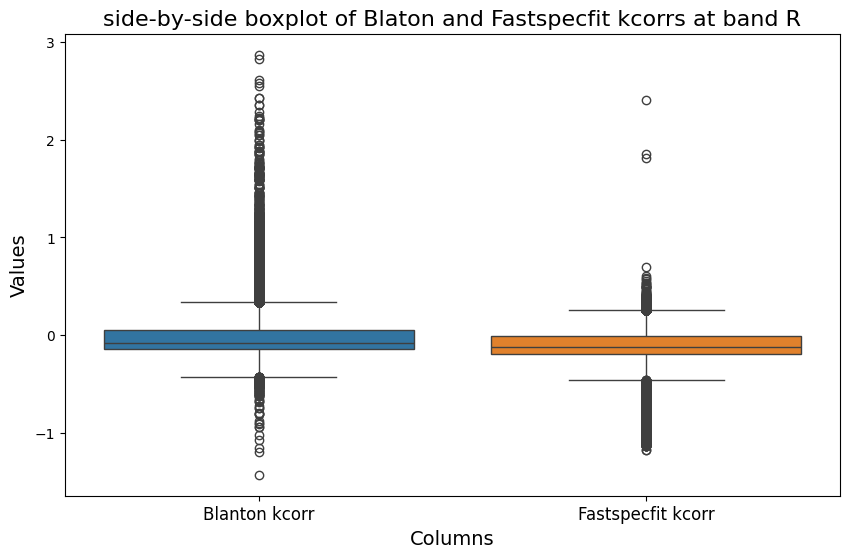

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Create a new DataFrame with the two columns you want to plot side by side
data = merged_df[['kcorr_sdss_01_r', 'KCORR01_SDSS_R']]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

# Set plot labels and title
plt.title('side-by-side boxplot of Blaton and Fastspecfit kcorrs at band R', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Custom subtitles for each column
plt.xticks([0, 1], ['Blanton kcorr', 'Fastspecfit kcorr'], fontsize=12)

# Show the plot
plt.show()


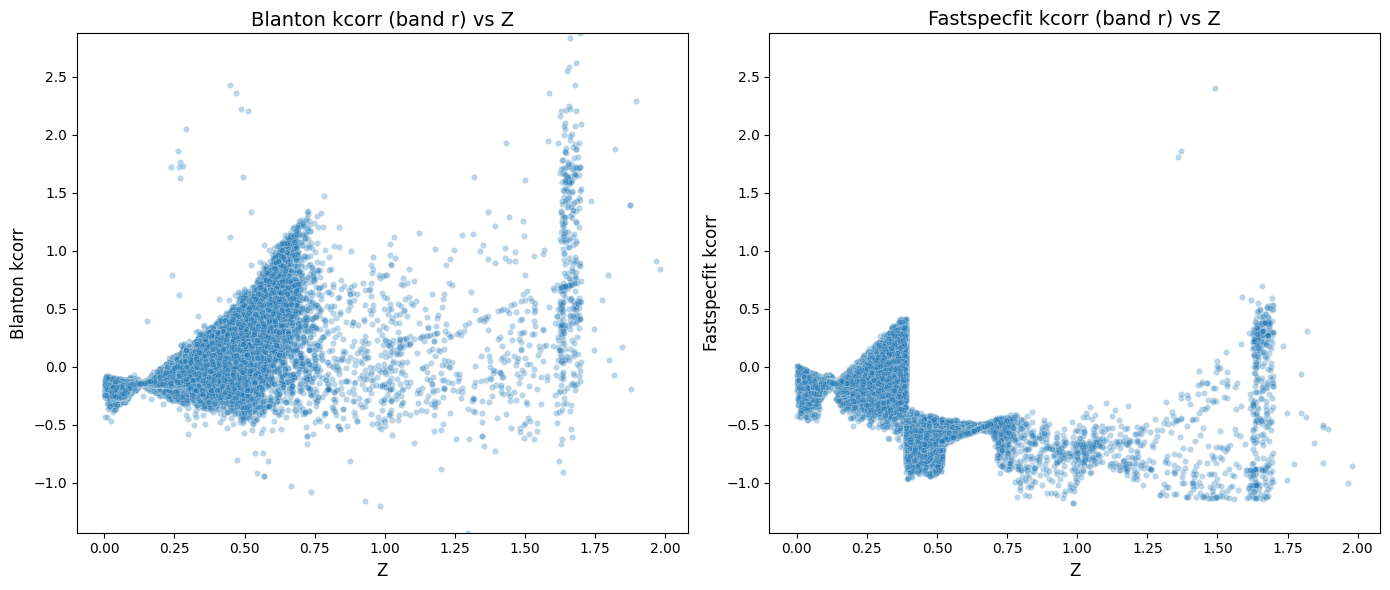

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for 'kcorr_sdss_01_r' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='kcorr_sdss_01_r', ax=axes[0], s=20, alpha=0.3)
axes[0].set_title('Blanton kcorr (band r) vs Z', fontsize=14)
axes[0].set_xlabel('Z', fontsize=12)
axes[0].set_ylabel('Blanton kcorr', fontsize=12)

# Scatter plot for 'KCORR01_SDSS_R' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='KCORR01_SDSS_R', ax=axes[1], s=20, alpha=0.3)
axes[1].set_title('Fastspecfit kcorr (band r) vs Z', fontsize=14)
axes[1].set_xlabel('Z', fontsize=12)
axes[1].set_ylabel('Fastspecfit kcorr', fontsize=12)

# Set the same y-range for both scatterplots
y_min = min(merged_df['kcorr_sdss_01_r'].min(), merged_df['KCORR01_SDSS_R'].min())
y_max = max(merged_df['kcorr_sdss_01_r'].max(), merged_df['KCORR01_SDSS_R'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


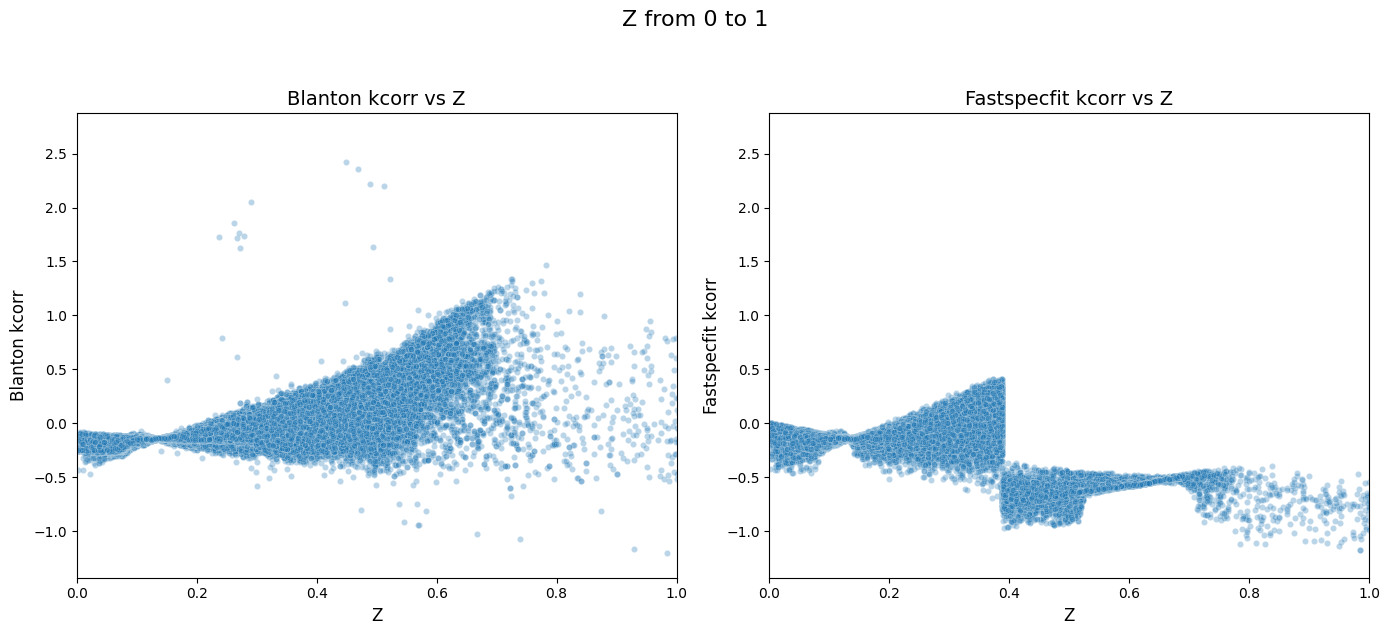

In [9]:
# Assuming merged_df is your DataFrame
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for 'kcorr_sdss_01_r' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='kcorr_sdss_01_r', ax=axes[0], s=20, alpha=0.3)
axes[0].set_title('Blanton kcorr vs Z', fontsize=14)
axes[0].set_xlabel('Z', fontsize=12)
axes[0].set_ylabel('Blanton kcorr', fontsize=12)

# Scatter plot for 'KCORR01_SDSS_R' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='KCORR01_SDSS_R', ax=axes[1], s=20, alpha=0.3)
axes[1].set_title('Fastspecfit kcorr vs Z', fontsize=14)
axes[1].set_xlabel('Z', fontsize=12)
axes[1].set_ylabel('Fastspecfit kcorr', fontsize=12)

# Set the same y-range for both scatterplots
y_min = min(merged_df['kcorr_sdss_01_r'].min(), merged_df['KCORR01_SDSS_R'].min())
y_max = max(merged_df['kcorr_sdss_01_r'].max(), merged_df['KCORR01_SDSS_R'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Restrict the x-axis (Z) to the range [0, 1]
axes[0].set_xlim(0, 1)
axes[1].set_xlim(0, 1)

# Add a title on top for the entire figure
fig.suptitle('Z from 0 to 1', fontsize=16, y=1.05)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Error analysis

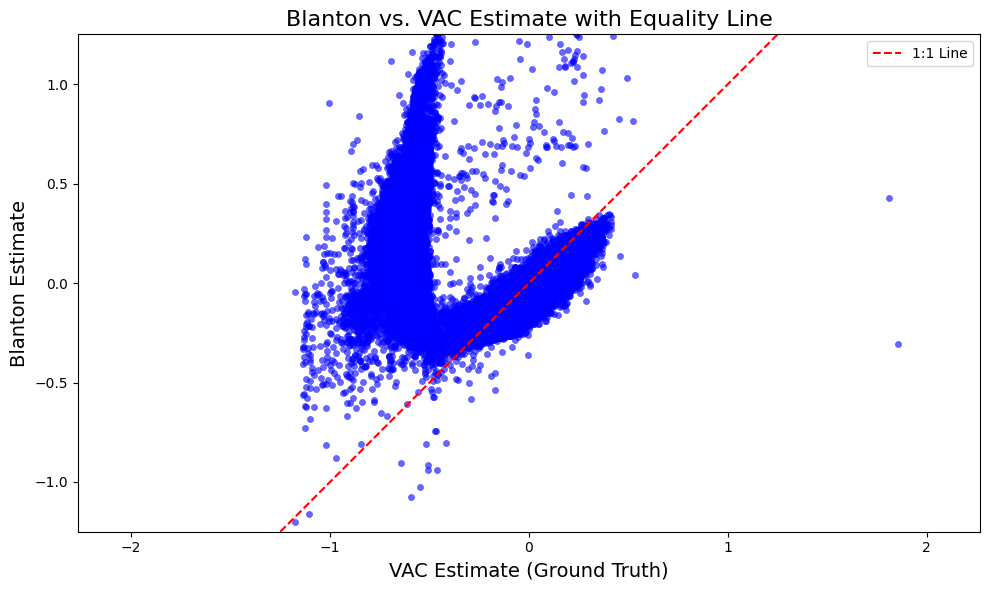

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='KCORR01_SDSS_R', 
    y='kcorr_sdss_01_r', 
    data=merged_df, 
    color="blue", 
    alpha=0.6, 
    edgecolor=None, 
    s=20  # Reduced marker size for smaller dots
)
plt.plot([-1.25, 2], [-1.25, 2], color='red', linestyle='--', label="1:1 Line")  # Identity line y = x
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.gca().set_aspect('equal', adjustable='datalim')  # Set equal aspect ratio
plt.xlabel("VAC Estimate (Ground Truth)", fontsize=14)
plt.ylabel("Blanton Estimate", fontsize=14)
plt.title("Blanton vs. VAC Estimate with Equality Line", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


There are two notorious clusters of points. One of the clusters seems to allign around the identity line, meaning that both distributions agree. The other cluster forms a vertical line and shows a mass o points where Blanton and Fastpecfit estimations disagree.

Let's assume VAC estimation to be perfect, and calculate the error of Blanton:

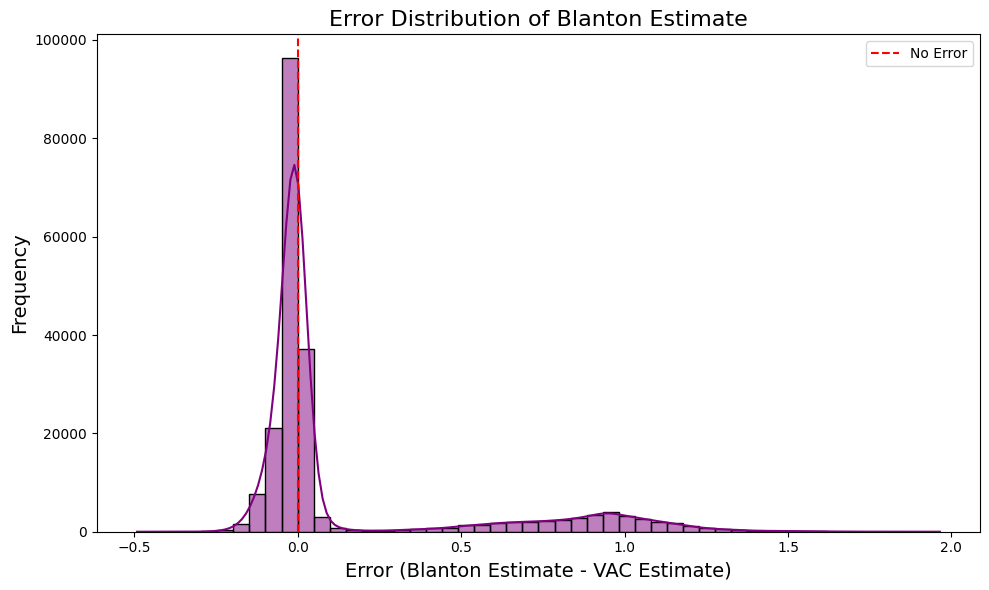

In [11]:
merged_df['error'] = merged_df['kcorr_sdss_01_r'] - merged_df['KCORR01_SDSS_R']

# Filter the data to restrict the domain
filtered_df = merged_df[(merged_df['error'] >= -1) & (merged_df['error'] <= 2)]

# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['error'], kde=True, color="purple", bins=50)
plt.axvline(0, color='red', linestyle='--', label="No Error")
plt.xlabel("Error (Blanton Estimate - VAC Estimate)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Error Distribution of Blanton Estimate", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


# Restricting to Z < 0.37 ; where both estimations seem to agree

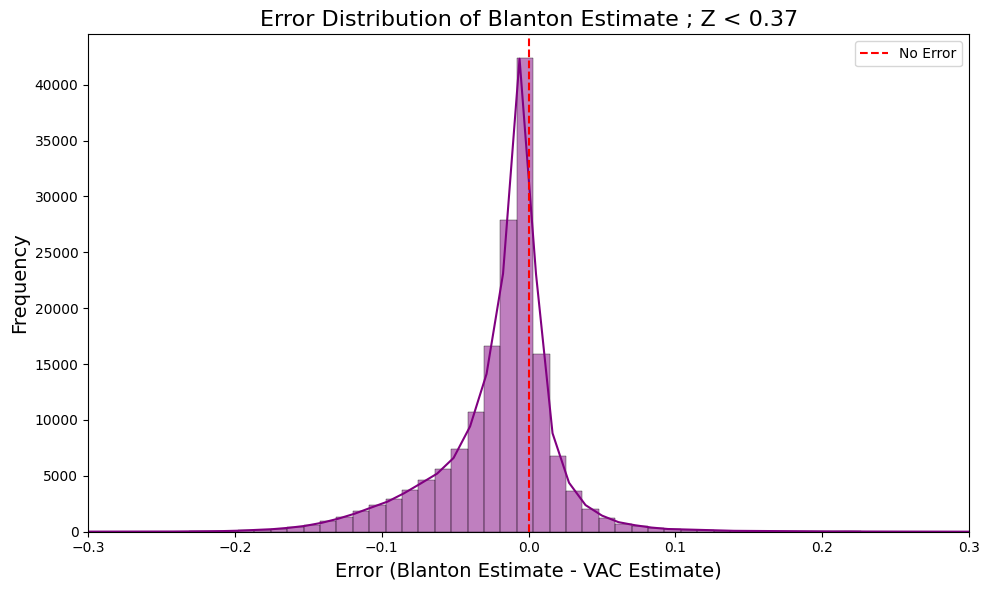

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the error
merged_df['error'] = merged_df['kcorr_sdss_01_r'] - merged_df['KCORR01_SDSS_R']
merged_df['error'] = merged_df['error'][merged_df['Z']<0.37]
# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['error'], kde=True, color="purple", bins=200)
plt.axvline(0, color='red', linestyle='--', label="No Error")
plt.xlabel("Error (Blanton Estimate - VAC Estimate)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim((-0.3,0.3))
plt.title("Error Distribution of Blanton Estimate ; Z < 0.37", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

We can see that for Z < 0.37 ; the Blanton approximations do agree with FastSpecFit approximations.
For Z > 0.37 ; the error is notorious.

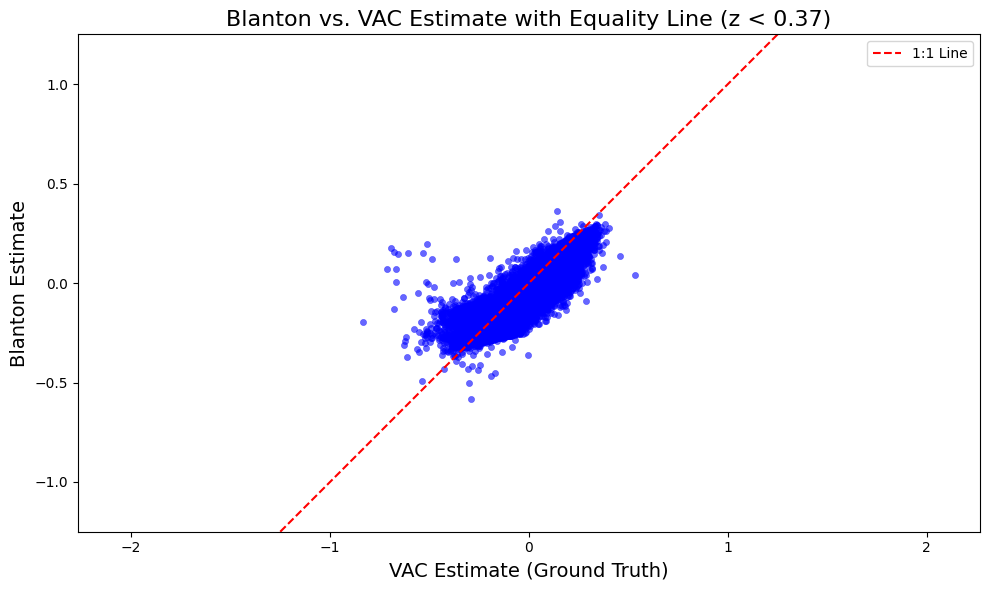

In [13]:
plt.figure(figsize=(10, 6))

# Filter the dataframe where z < 0.37
filtered_df = merged_df[merged_df['z'] < 0.37]

# Scatter plot using the filtered dataframe
sns.scatterplot(
    x='KCORR01_SDSS_R', 
    y='kcorr_sdss_01_r', 
    data=filtered_df, 
    color="blue", 
    alpha=0.6, 
    edgecolor=None, 
    s=20  # Reduced marker size for smaller dots
)

# Add the equality line
plt.plot([-1.25, 2], [-1.25, 2], color='red', linestyle='--', label="1:1 Line")  # Identity line y = x

# Set limits and aspect ratio
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.gca().set_aspect('equal', adjustable='datalim')  # Set equal aspect ratio

# Add labels, title, and legend
plt.xlabel("VAC Estimate (Ground Truth)", fontsize=14)
plt.ylabel("Blanton Estimate", fontsize=14)
plt.title("Blanton vs. VAC Estimate with Equality Line (z < 0.37)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


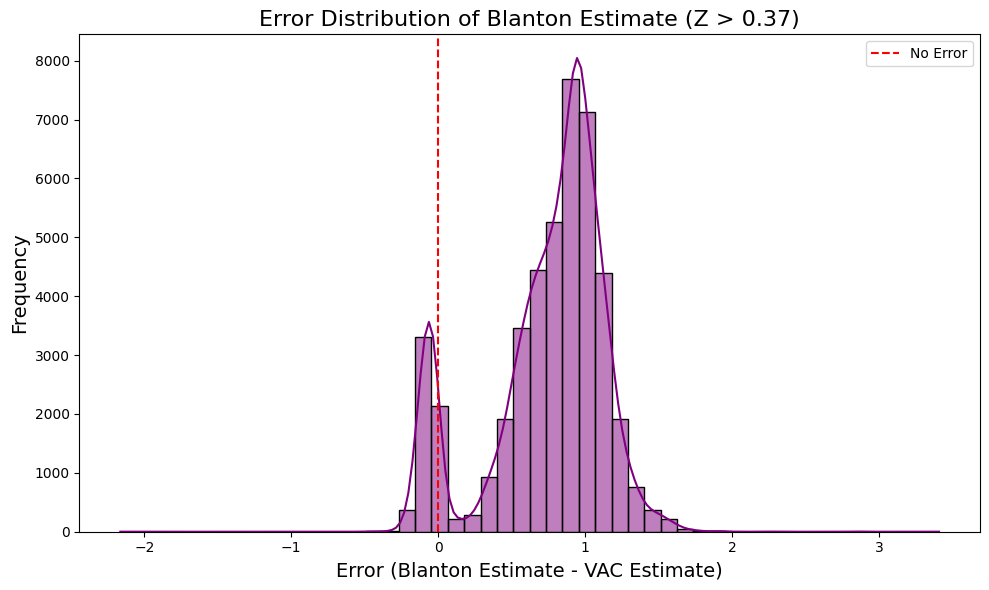

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the error
merged_df['error'] = merged_df['kcorr_sdss_01_r'] - merged_df['KCORR01_SDSS_R']
merged_df['error'] = merged_df['error'][merged_df['Z']>0.37]
# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['error'], kde=True, color="purple", bins=50)
plt.axvline(0, color='red', linestyle='--', label="No Error")
plt.xlabel("Error (Blanton Estimate - VAC Estimate)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Error Distribution of Blanton Estimate (Z > 0.37)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

From the previous plots, we can observe that blanton and VAC (FastSpecFit) estimations disagree for z > 0.37

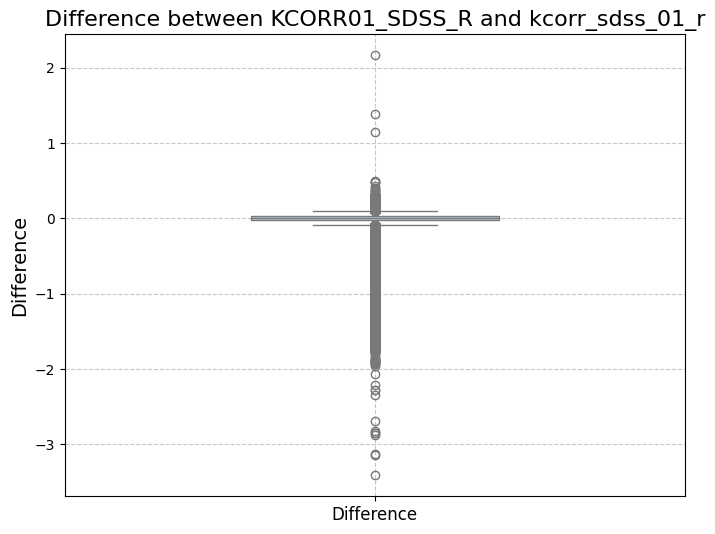

In [15]:
diff = merged_df['KCORR01_SDSS_R'] - merged_df['kcorr_sdss_01_r']

# Create a Seaborn boxplot with better aesthetics
plt.figure(figsize=(8, 6))
sns.boxplot(data=diff, color='lightblue', width=0.4)

# Customize the plot
plt.title('Difference between KCORR01_SDSS_R and kcorr_sdss_01_r', fontsize=16)
plt.ylabel('Difference', fontsize=14)
plt.xticks([0], ['Difference'], fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Aggregated stats

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = merged_df['KCORR01_SDSS_R']
y_pred = merged_df['kcorr_sdss_01_r']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("OVERALL STATS")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


OVERALL STATS
Mean Absolute Error (MAE): 0.1888
Mean Squared Error (MSE): 0.1566
Root Mean Squared Error (RMSE): 0.3957
R-squared (R²): -1.4499


In [17]:
y_true = merged_df['KCORR01_SDSS_R'][merged_df['Z']<0.37]
y_pred = merged_df['kcorr_sdss_01_r'][merged_df['Z']<0.37]

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("STATS FOR GALAXIES WHOSE Z < 0.37")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


STATS FOR GALAXIES WHOSE Z < 0.37
Mean Absolute Error (MAE): 0.0290
Mean Squared Error (MSE): 0.0021
Root Mean Squared Error (RMSE): 0.0462
R-squared (R²): 0.8317


# Beyond band r: Blanton vs FastSpecFit for bands g and z

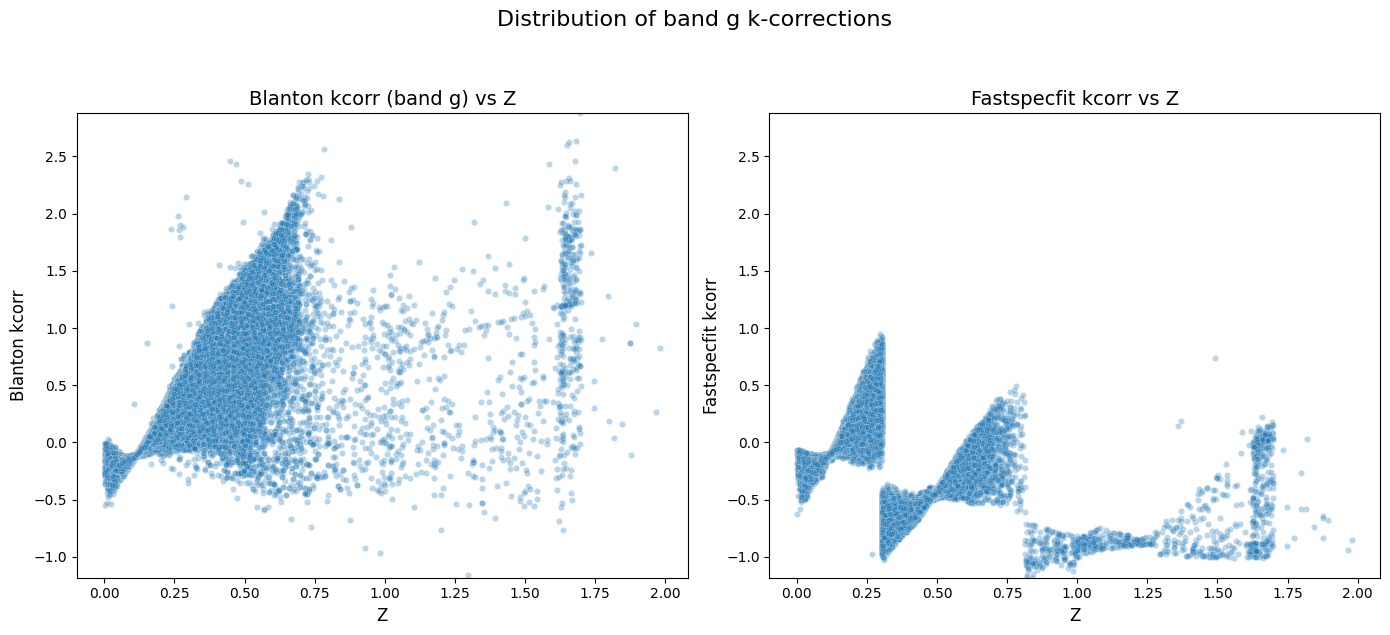

In [18]:
# Assuming merged_df is your DataFrame
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for 'kcorr_sdss_01_r' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='kcorr_sdss_01_g', ax=axes[0], s=20, alpha=0.3)
axes[0].set_title('Blanton kcorr (band g) vs Z', fontsize=14)
axes[0].set_xlabel('Z', fontsize=12)
axes[0].set_ylabel('Blanton kcorr', fontsize=12)

# Scatter plot for 'KCORR01_SDSS_R' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='KCORR01_SDSS_G', ax=axes[1], s=20, alpha=0.3)
axes[1].set_title('Fastspecfit kcorr vs Z', fontsize=14)
axes[1].set_xlabel('Z', fontsize=12)
axes[1].set_ylabel('Fastspecfit kcorr', fontsize=12)

# Set the same y-range for both scatterplots
y_min = min(merged_df['kcorr_sdss_01_g'].min(), merged_df['KCORR01_SDSS_G'].min())
y_max = max(merged_df['kcorr_sdss_01_g'].max(), merged_df['KCORR01_SDSS_G'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Restrict the x-axis (Z) to the range [0, 1]
#axes[0].set_xlim(0, 1)
#axes[1].set_xlim(0, 1)

# Add a title on top for the entire figure
fig.suptitle('Distribution of band g k-corrections', fontsize=16, y=1.05)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


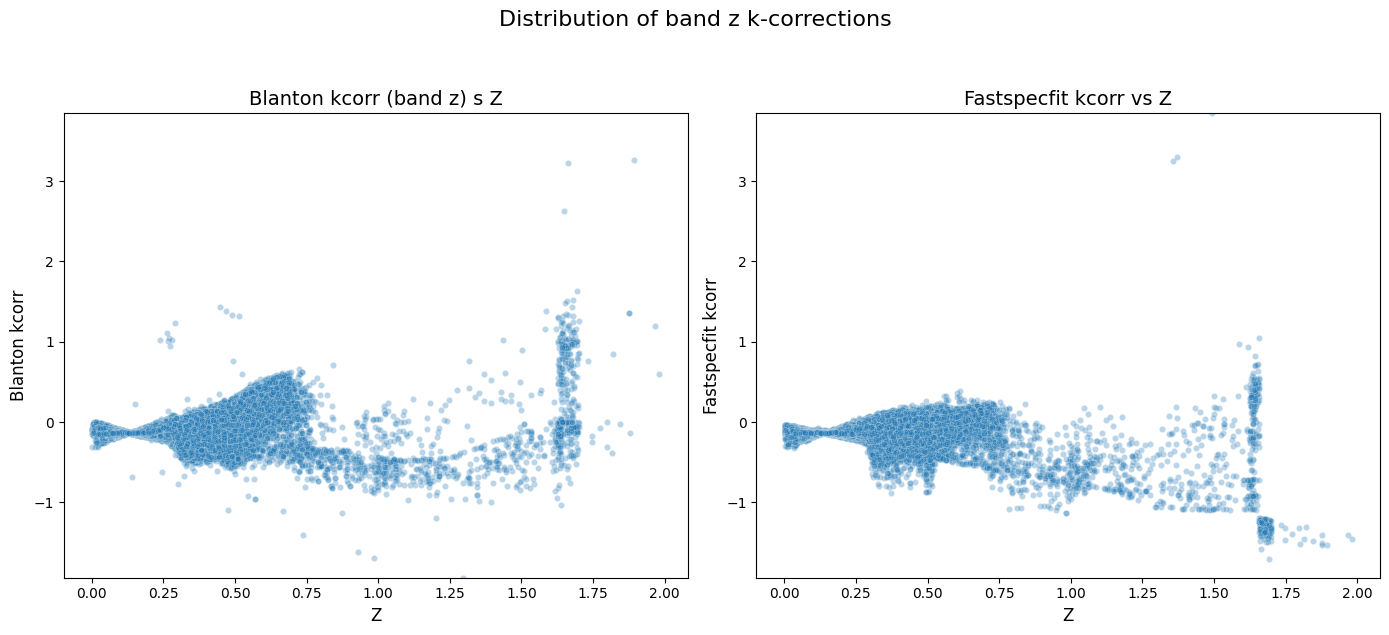

In [19]:
# Assuming merged_df is your DataFrame
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for 'kcorr_sdss_01_r' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='kcorr_sdss_01_z', ax=axes[0], s=20, alpha=0.3)
axes[0].set_title('Blanton kcorr (band z) vs Z', fontsize=14)
axes[0].set_xlabel('Z', fontsize=12)
axes[0].set_ylabel('Blanton kcorr', fontsize=12)

# Scatter plot for 'KCORR01_SDSS_R' vs 'Z' with smaller and transparent points
sns.scatterplot(data=merged_df, x='Z', y='KCORR01_SDSS_Z', ax=axes[1], s=20, alpha=0.3)
axes[1].set_title('Fastspecfit kcorr vs Z', fontsize=14)
axes[1].set_xlabel('Z', fontsize=12)
axes[1].set_ylabel('Fastspecfit kcorr', fontsize=12)

# Set the same y-range for both scatterplots
y_min = min(merged_df['kcorr_sdss_01_z'].min(), merged_df['KCORR01_SDSS_Z'].min())
y_max = max(merged_df['kcorr_sdss_01_z'].max(), merged_df['KCORR01_SDSS_Z'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Restrict the x-axis (Z) to the range [0, 1]
#axes[0].set_xlim(0, 1)
#axes[1].set_xlim(0, 1)

# Add a title on top for the entire figure
fig.suptitle('Distribution of band z k-corrections', fontsize=16, y=1.05)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


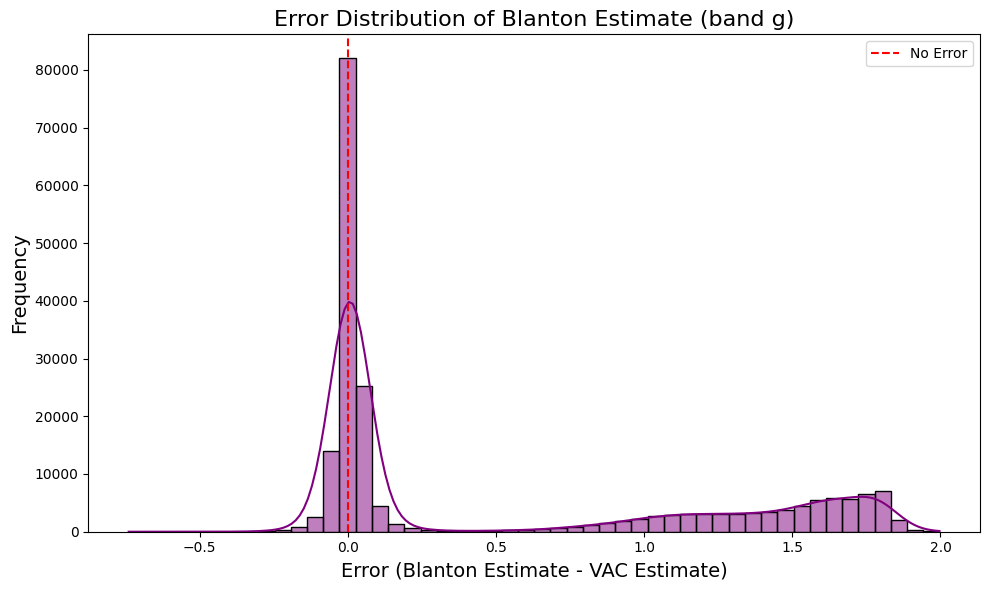

In [20]:
merged_df['error'] = merged_df['kcorr_sdss_01_g'] - merged_df['KCORR01_SDSS_G']

# Filter the data to restrict the domain
filtered_df = merged_df[(merged_df['error'] >= -1) & (merged_df['error'] <= 2)]

# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['error'], kde=True, color="purple", bins=50)
plt.axvline(0, color='red', linestyle='--', label="No Error")
plt.xlabel("Error (Blanton Estimate - VAC Estimate)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Error Distribution of Blanton Estimate (band g)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

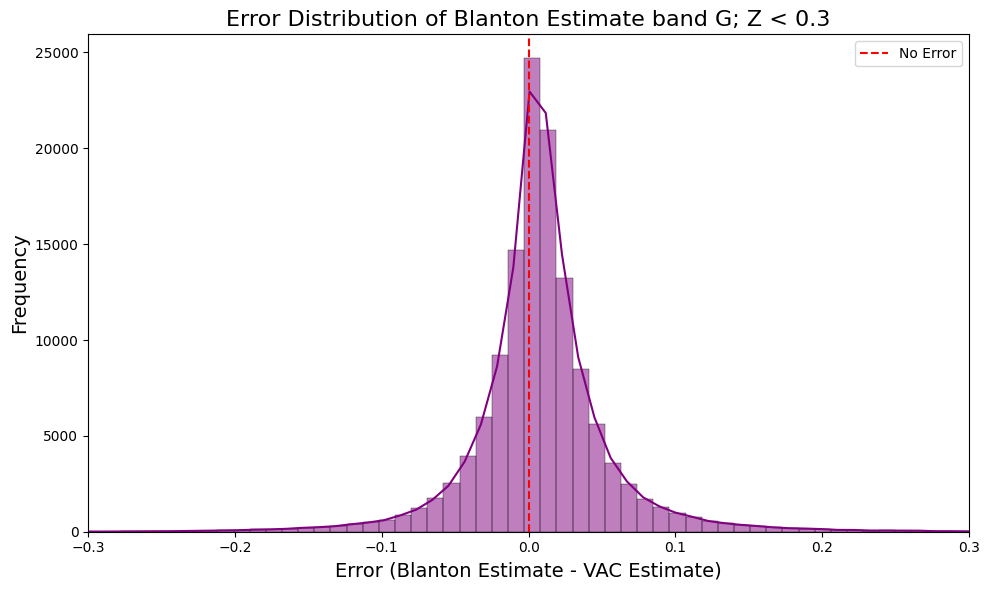

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the error
merged_df['error'] = merged_df['kcorr_sdss_01_g'] - merged_df['KCORR01_SDSS_G']
merged_df['error'] = merged_df['error'][merged_df['Z']<0.3]
# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['error'], kde=True, color="purple", bins=200)
plt.axvline(0, color='red', linestyle='--', label="No Error")
plt.xlabel("Error (Blanton Estimate - VAC Estimate)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim((-0.3,0.3))
plt.title("Error Distribution of Blanton Estimate band G; Z < 0.3", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

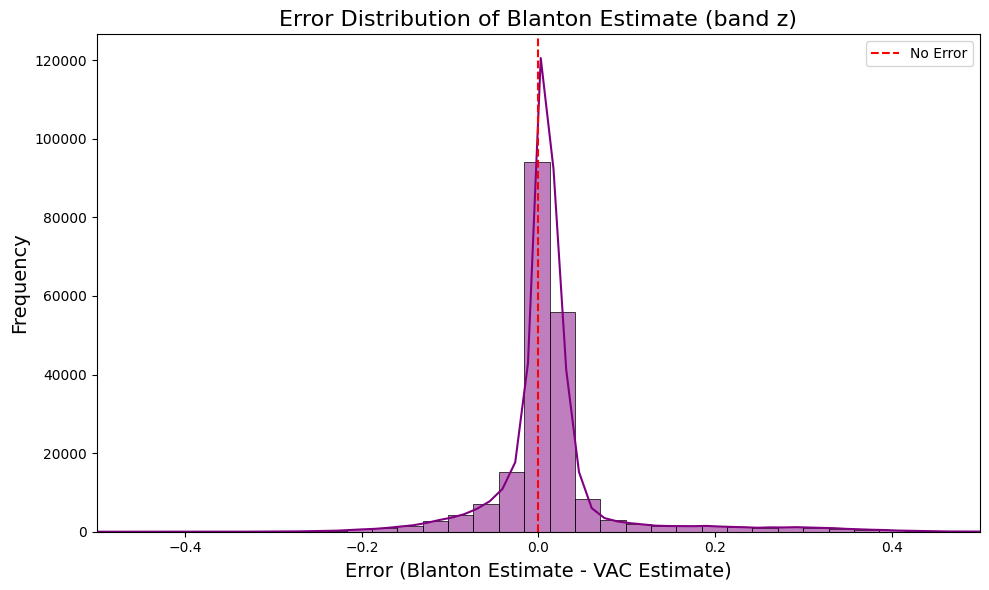

In [40]:
merged_df['error'] = merged_df['kcorr_sdss_01_z'] - merged_df['KCORR01_SDSS_Z']

# Filter the data to restrict the domain
filtered_df = merged_df[(merged_df['error'] >= -1) & (merged_df['error'] <= 2)]

# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['error'], kde=True, color="purple", bins=100)
plt.axvline(0, color='red', linestyle='--', label="No Error")
plt.xlabel("Error (Blanton Estimate - VAC Estimate)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim((-0.5,0.5))
plt.title("Error Distribution of Blanton Estimate (band z)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

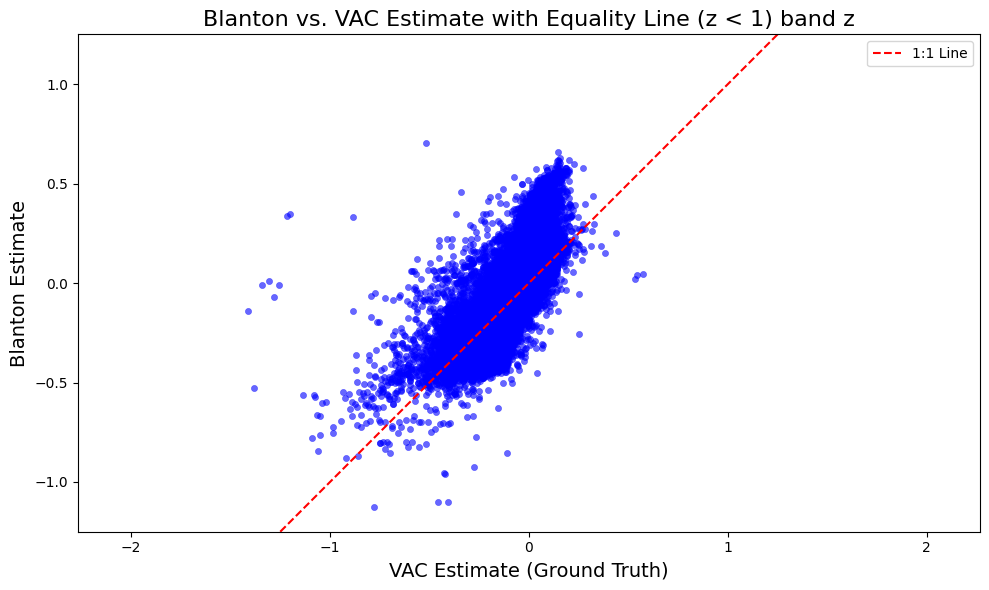

In [49]:
plt.figure(figsize=(10, 6))

filtered_df = merged_df[merged_df['z'] < 1]

# Scatter plot using the filtered dataframe
sns.scatterplot(
    x='KCORR01_SDSS_Z', 
    y='kcorr_sdss_01_z', 
    data=filtered_df, 
    color="blue", 
    alpha=0.6, 
    edgecolor=None, 
    s=20  # Reduced marker size for smaller dots
)

# Add the equality line
plt.plot([-1.25, 2], [-1.25, 2], color='red', linestyle='--', label="1:1 Line")  # Identity line y = x

# Set limits and aspect ratio
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.gca().set_aspect('equal', adjustable='datalim')  # Set equal aspect ratio

# Add labels, title, and legend
plt.xlabel("VAC Estimate (Ground Truth)", fontsize=14)
plt.ylabel("Blanton Estimate", fontsize=14)
plt.title("Blanton vs. VAC Estimate with Equality Line (z < 1) band z", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
y_true = merged_df['KCORR01_SDSS_G'][merged_df['Z']<0.3]
y_pred = merged_df['kcorr_sdss_01_g'][merged_df['Z']<0.3]

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("BAND G - STATS FOR GALAXIES WHOSE Z < 0.3")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


BAND G - STATS FOR GALAXIES WHOSE Z < 0.3
Mean Absolute Error (MAE): 0.0311
Mean Squared Error (MSE): 0.0025
Root Mean Squared Error (RMSE): 0.0501
R-squared (R²): 0.9588


In [52]:
y_true = merged_df['KCORR01_SDSS_G']
y_pred = merged_df['kcorr_sdss_01_g']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("BAND G - OVERALL STATS")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


BAND G - OVERALL STATS
Mean Absolute Error (MAE): 0.5369
Mean Squared Error (MSE): 0.7762
Root Mean Squared Error (RMSE): 0.8810
R-squared (R²): -3.4290


In [55]:
y_true = merged_df['KCORR01_SDSS_Z'][merged_df['Z']<1]
y_pred = merged_df['kcorr_sdss_01_z'][merged_df['Z']<1]

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("BAND Z - OVERALL STATS")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


BAND Z - OVERALL STATS
Mean Absolute Error (MAE): 0.0364
Mean Squared Error (MSE): 0.0052
Root Mean Squared Error (RMSE): 0.0724
R-squared (R²): -0.0533


# Conclusion

| Band | Redshift Range    | MSE     | R²     |
|------|--------------------|---------|--------|
| r    | up to 0.37        | 0.0021  | 0.83   |
| r    | unrestricted       | 0.1566  | -1.44  |
| g    | up to 0.3         | 0.00245 | 0.95   |
| g    | unrestricted       | 0.7762  | -3.42  |
| z    | unrestricted       | 0.0052  | -0.05  |
 

BAND R: 
* For Z < 0.37 ; Blanton K correction and the VAC estimation tend to agree, although Blanton's estimation can often underestimates the estimation slightly. Average absolute error is ~0.03.
* For Z > 0.37 Blanton estimates diverge wildly from FastSpecFit estimations.

BAND G:
* Similar to band R, but the divergence takes place at Z ~ 0.3

BAND Z:
* This is a funny band. Does it even make sense to predict K corrections at band z for galaxies at this redshift? The VAC values seem unreliable, given they are mostly negative



# Adding noise to the redshift provided to Blanton's KCorrect
KCorrect relies heavily on the redshift parameter being provided. Let's add noise to the redshift and inspect the effect in Blanton's estimate reliability

In [62]:
blanton_kcorrs_path = "../data/blanton_kcorrs_01.pickle"

# These estimations have uniform noise in the redshift between [-0.1, 0.1]
with open(blanton_kcorrs_path,"rb") as f:
    kcorr_df_01 = pickle.load(f)

# These estimations have uniform noise in the redshift between [-0.2, 0.2]
blanton_kcorrs_path = "../data/blanton_kcorrs_02.pickle"

with open(blanton_kcorrs_path,"rb") as f:
    kcorr_df_02 = pickle.load(f)

In [63]:
merged_df_01 = kcorr_df_01.merge(fastspec_df, on="targetid", how="inner")
merged_df_02 = kcorr_df_02.merge(fastspec_df, on="targetid", how="inner")

In [77]:
def calculate_stats(band, df, z_limit):
    y_true = df['KCORR01_SDSS_'+band.title()][df['Z']<z_limit]
    y_pred = df['kcorr_sdss_01_'+band][df['Z']<z_limit]
    
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"BAND {band} - STATS FOR GALAXIES WHOSE Z < {z_limit}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
       

In [78]:
calculate_stats("g",merged_df,0.3)
calculate_stats("g",merged_df_01,0.3)
calculate_stats("g",merged_df_02,0.3)

BAND g - STATS FOR GALAXIES WHOSE Z < 0.3
Mean Absolute Error (MAE): 0.0311
Mean Squared Error (MSE): 0.0025
Root Mean Squared Error (RMSE): 0.0501
R-squared (R²): 0.9588
BAND g - STATS FOR GALAXIES WHOSE Z < 0.3
Mean Absolute Error (MAE): 0.1217
Mean Squared Error (MSE): 0.0238
Root Mean Squared Error (RMSE): 0.1544
R-squared (R²): 0.6088
BAND g - STATS FOR GALAXIES WHOSE Z < 0.3
Mean Absolute Error (MAE): 0.2148
Mean Squared Error (MSE): 0.0760
Root Mean Squared Error (RMSE): 0.2757
R-squared (R²): -0.2481


In [79]:
calculate_stats("r",merged_df,0.37)
calculate_stats("r",merged_df_01,0.37)
calculate_stats("r",merged_df_02,0.37)

BAND r - STATS FOR GALAXIES WHOSE Z < 0.37
Mean Absolute Error (MAE): 0.0290
Mean Squared Error (MSE): 0.0021
Root Mean Squared Error (RMSE): 0.0462
R-squared (R²): 0.8317
BAND r - STATS FOR GALAXIES WHOSE Z < 0.37
Mean Absolute Error (MAE): 0.0495
Mean Squared Error (MSE): 0.0043
Root Mean Squared Error (RMSE): 0.0657
R-squared (R²): 0.6603
BAND r - STATS FOR GALAXIES WHOSE Z < 0.37
Mean Absolute Error (MAE): 0.0746
Mean Squared Error (MSE): 0.0102
Root Mean Squared Error (RMSE): 0.1011
R-squared (R²): 0.1960


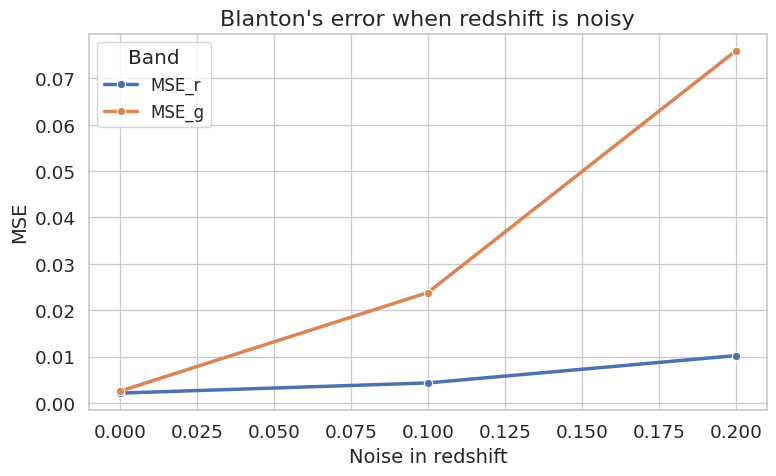

In [81]:
noise = [0, 0.1, 0.2]
mse_r = [0.0021, 0.0043, 0.0102]
mse_g = [0.0025, 0.0238, 0.0760]

# Create a DataFrame for easier plotting
data = pd.DataFrame({
    'Noise': noise,
    'MSE_r': mse_r,
    'MSE_g': mse_g
})

# Melt the DataFrame for seaborn compatibility
melted_data = data.melt(id_vars=['Noise'], value_vars=['MSE_r', 'MSE_g'], 
                        var_name='Band', value_name='MSE')

# Plot using seaborn
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 5))
sns.lineplot(data=melted_data, x='Noise', y='MSE', hue='Band', marker='o', linewidth=2.5)

# Add labels and title
plt.title("Blanton's error when redshift is noisy", fontsize=16)
plt.xlabel("Noise in redshift", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend(title="Band", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()